In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [9]:
control = pd.read_csv("anon-data/control_questionnaire.csv")
experimental = pd.read_csv("anon-data/experimental_questionnaire.csv")

In [10]:
question_mapping = {
    "I am confident in my English skills.": "A1",
    "I feel comfortable programming in Python.": "A2",
    "I feel comfortable programming in JavaScript and Node.js.": "A3",
    "I feel comfortable working with Firefox.": "A4",
    "I feel comfortable working with Visual Studio Code.": "A5",
    "I feel comfortable working with Linux-based desktop-focused operating systems.": "A6",
    "I feel comfortable using Visual Studio Code to edit Dockerfiles.": "A7",
    "I feel comfortable interacting with Docker through a terminal.": "A8",
    "I was able to understand what to do in Task 1.": "B1",
    "I was able to finish Task 1 without any problems.": "B2",
    "Dockerlive helped me do Task 1.": "B3",
    "I was able to understand what to do in Task 2.": "C1",
    "I was able to finish Task 2 without any problems.": "C2",
    "Dockerlive helped me do Task 2.": "C3",
    "I was able to understand what to do in Task 3.": "D1",
    "I was able to finish Task 3 without any problems.": "D2",
    "Dockerlive helped me do Task 3.": "D3",
    "I felt comfortable with the remote environment.": "E1",
    "I felt like the tasks took a long time to carry out.": "F1",
    "I felt like the tasks would have been easier to carry out if I had access to other tools.": "F2",
    "Please write the name of any tool(s) that you believe would have helped you carry out the tasks.": "F3",
    "Dockerlive made the tasks easy to carry out.": "G1",
    "Dockerlive was easy to use.": "G2",
    "Dockerlive's suggestions were useful in carrying out the tasks.": "G3",
    "I would like to use Dockerlive in the future.": "G4",
    "Which of Dockerlive's features helped you the most? And why?": "G5",
    "What problems did you run into while using Dockerlive to do the tasks?": "G6",
    "If you could, how would you improve Dockerlive?": "G7"
}

experimental.rename(columns=question_mapping, inplace=True)
control.rename(columns=question_mapping, inplace=True)


In [11]:
ctrl_sections = [
    ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8"],
    ["B1", "B2", "C1", "C2", "D1", "D2"],
    ["E1", "F1", "F2"]
]

exp_sections = [
    ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8"],
    ["B1", "B2", "B3", "C1", "C2", "C3", "D1", "D2", "D3"],
    ["E1", "F1", "F2", "G1", "G2", "G3", "G4"]
]

def plot_likert(df, questions, group):
    subset = df[questions]

    new_df_elems = []

    for _, row in subset.iterrows():
        for question in questions:
            new_df_elems.append([row[question], question])

    new_df = pd.DataFrame(new_df_elems, columns=["value", "Question"])

    custom_palette = {
        1: 'C3',
        2: 'C1',
        3: 'C7',
        4: 'C8',
        5: 'C2'
    }

    sns.histplot(new_df, x="Question", hue="value", stat="probability", multiple="fill", shrink=.8, palette=custom_palette)

    sections = list(set([x[0] for x in questions]))
    section = None

    if len(sections) == 1:
        section = sections[0]
    else:
        sections.sort()
        section = "_".join(sections)

    filename = f"section_{section}_{group}.svg"
    plt.gca().invert_yaxis()
    plt.ylabel("Percentage")

    num_to_text = {
        1: "Strongly Disagree",
        2: "Disagree",
        3: "Neutral",
        4: "Agree",
        5: "Strongly Agree"
    }

    lines = [mpatches.Patch(color=custom_palette[x], label=num_to_text[x]) for x in custom_palette]   

    plt.legend(handles=lines)
    title = group[0].upper() + group[1:]
    plt.title(title)

    plt.savefig(f"images/{filename}")
    plt.show()

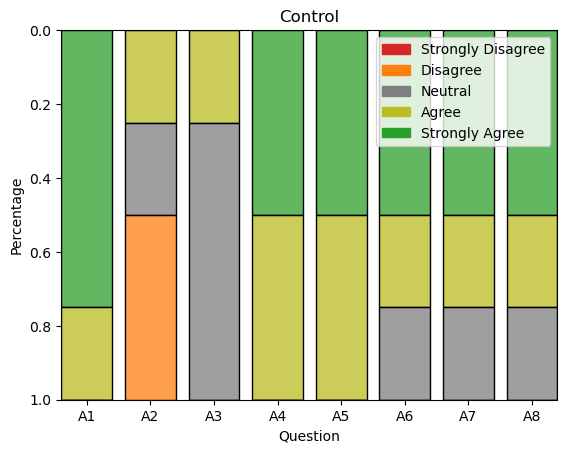

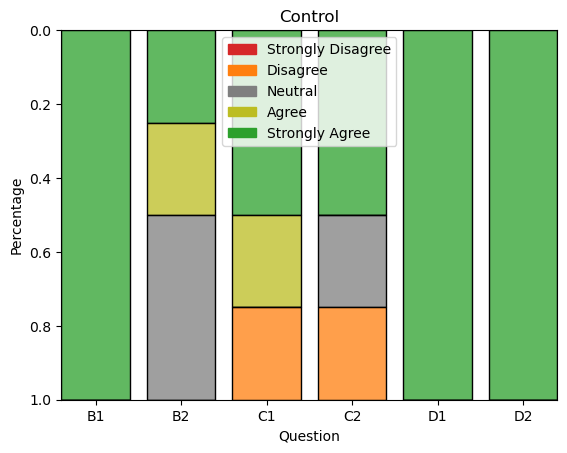

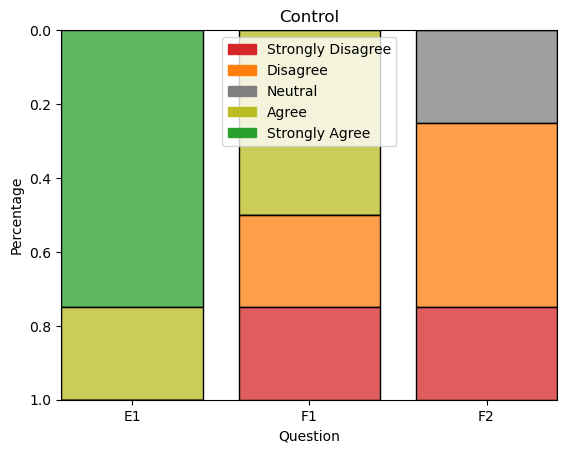

In [12]:
for i in ctrl_sections:
    plot_likert(control, i, "control")

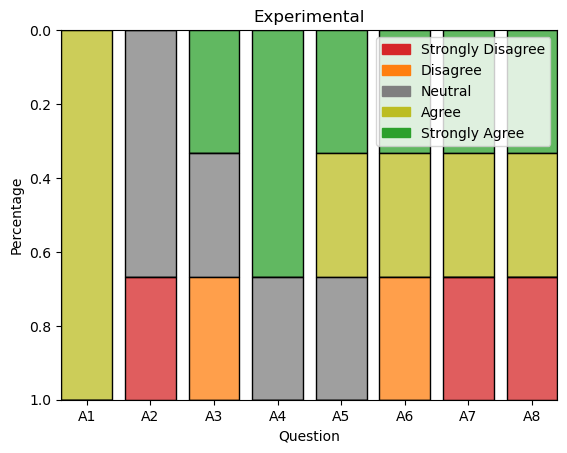

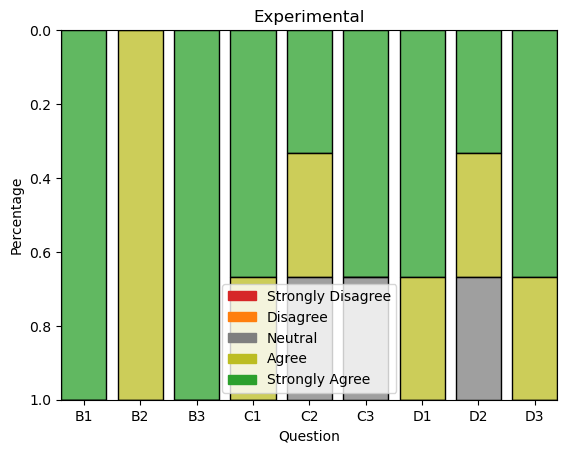

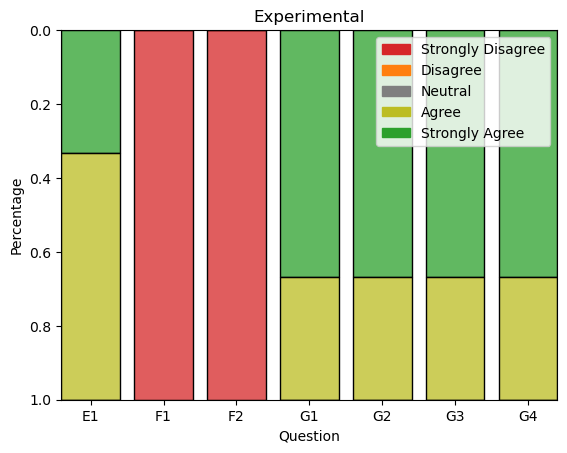

In [13]:
for i in exp_sections:
    plot_likert(experimental, i, "experimental")

In [14]:
text_sections_ctrl = [
    ["F3"]
]

text_sections_exp = [
    ["F3"],
    ["G5", "G6", "G7"]
]

for i in text_sections_ctrl:
    print(control[i])

for i in text_sections_exp:
    print(experimental[i])

                                                  F3
0                                                NaN
1                            Docker Vscode extension
2  IntelliJ IDEA because of the Dockerfile autoco...
3                                                NaN
                                                  F3
0                                                NaN
1  I don't think that I would need any more tools...
2                                                NaN
                                                  G5  \
0  Para quem conhecia muito pouco sobre dockerfil...   
1  Detecting the dependencies was a surprise for ...   
2  Definitely the  user related operations, that'...   

                                                  G6  \
0  Não ficou claro que tinha a tap problems dispo...   
1                                                NaN   
2  Trying to over the warning lines, the UX is no...   

                                                  G7  
0  1 ponto ja suge